In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [35]:
#This command allows visuals to appear in notebook
%matplotlib inline 

In [36]:
#creating path
path= r'C:\Users\13472\Documents\Task 6'

In [37]:
#Importing dataset
df = pd.read_csv(os.path.join(path,'02. Prepared Data','df_cacao_cleaned.csv' ),index_col = False)

In [38]:
df.head()

,Unnamed: 0,Company_Name,Bar Origin,Ref,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [39]:
# Changing cocoa_percentage data type
df['Cocoa_Percentage'] = df['Cocoa_Percentage'].str.replace('%','').astype(float)/100

In [40]:
df.head()

,Unnamed: 0,Company_Name,Bar Origin,Ref,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


In [41]:
df.columns

Index(['Unnamed: 0', 'Company_Name', ' Bar Origin', 'Ref', 'Review_Date',
       'Cocoa_Percentage', ' Company_Location', 'Rating', 'Bean_Origin'],
      dtype='object')

In [42]:
# Dropping Columns
df.drop(columns = ["Unnamed: 0","Company_Name"," Bar Origin","Ref", " Company_Location","Bean_Origin"], axis=1, inplace= True)

In [43]:
df.head()

,Review_Date,Cocoa_Percentage,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50


# The elbow technique

In [44]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i, n_init="auto") for i in num_cl] # Defines k-means clusters in the range assigned above

In [45]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Create a score that represents a rate of variation for the given cluster option

score

[-15789.176708857938,
 -4532.831320982333,
 -2165.245653575306,
 -1449.6632358027848,
 -1007.7907329354011,
 -1093.7892909646375,
 -693.995480820657,
 -632.2381321629098,
 -521.41682830722]

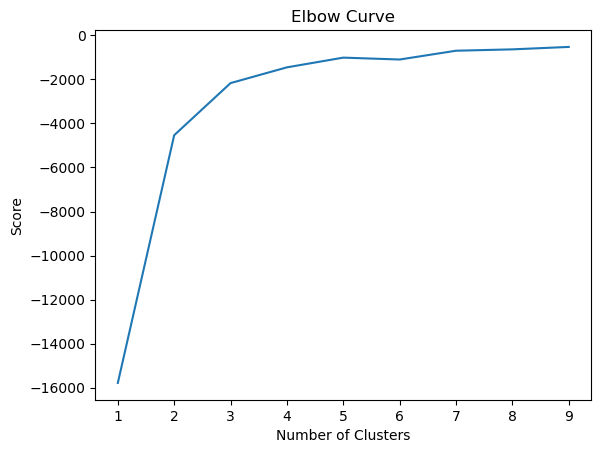

In [46]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The number of clusters that need to be used should be 3 because after the 3rd cluster the line starts to become straight.

# K-means clustering

In [47]:
# Dropping Review data column
df.drop(columns = ["Review_Date"], axis=1, inplace= True)

In [48]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 3, n_init="auto")

In [49]:
# Fitting the Kmeans object to the data
kmeans.fit(df)

KMeans(n_clusters=3, n_init='auto')

In [50]:
df['clusters'] = kmeans.fit_predict(df)

In [51]:
df.head()

,Cocoa_Percentage,Rating,clusters
0,0.63,3.75,0
1,0.70,2.75,1
2,0.70,3.00,1
3,0.70,3.50,0
4,0.70,3.50,0


In [52]:
df['clusters'].value_counts()

0    1005
1     727
2      63
Name: clusters, dtype: int64

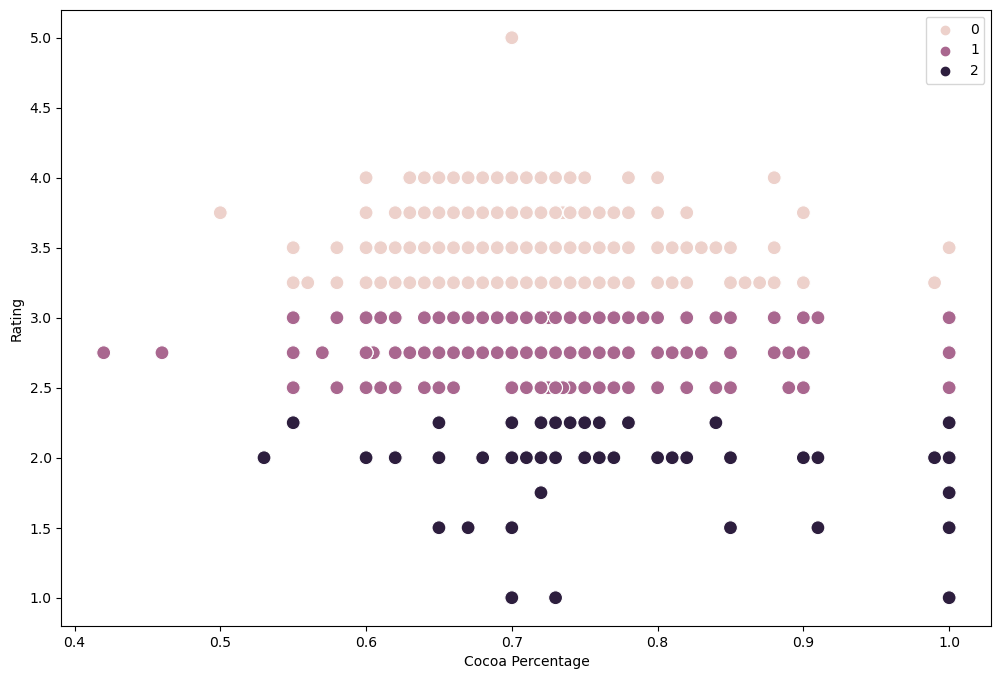

In [53]:
# Plotting clusters for "Cocoa_Percentage" and "Rating" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Cocoa_Percentage'], y=df['Rating'], hue=kmeans.labels_,s=100)

ax.grid(False) #Removes grid from background
plt.xlabel('Cocoa Percentage') # Label x-axis
plt.ylabel('Rating') # Label y-axis
plt.show()

The cluster colored in dark purple predominantly consists of chocolate bars with cocoa percentages below the average, receiving ratings ranging from 2 to 4. On the other hand, the purple cluster mainly comprises bars with cocoa percentages higher than the average, also receiving ratings between 2 and 4. The pink cluster, however, contains bars with diverse cocoa percentages and ratings. In general, the clusters lack coherence as the data points within them are not consistently aligned.

In [54]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [55]:
df.groupby('cluster').agg({'Cocoa_Percentage':['mean', 'median'], 
                         'Rating':['mean', 'median']})

Cocoa_Percentage           Rating       
                        mean median      mean median
cluster                                             
dark purple         0.781111   0.75  1.900794   2.00
pink                0.711348   0.70  3.528607   3.50
purple              0.719216   0.70  2.823590   2.75

Based on the visualization of the clusters it seems like the data needs to be explored further, due to the fact that the mean and median are similar for both the "Cocoa Percentage and "Rating" clusters. 